## Exploratory Data Analysis 

### **I. Data Exploration and Cleaning**

1.  **Data Exploration:**  This section presents seven key observations made from the raw dataset. 
2.  **Summary of Data Exploration**:  This section provides seven actionable cleaning steps. 
3.  **Data Cleaning:**  This section carries out the data cleaning steps outlined in the previous section. 

### **II. Bivariate Analysis and Transformation**

1.  **Bivariate Analysis**: This section examines the relationship between temperature and various features using a correlation matrix and visualizations. 
    - **Correlation Matrix**:  Visualizes relationships between numerical variables. 
    - **Temperature Against Categorical Data**: Visualizes the relationship between temperature and categorical variables. 
2.  **Data Transformation**: This section outlines the transformation of the data by combining nutrient sensor attributes and concatenating plant type and stage attributes. 
3.  **Summary of Bivariate Analysis**: This section summarizes observations from the bivariate analysis and the need for data transformation. 

### **III. Feature Selection for Machine Learning**

1.  **Columns Excluded for Machine Learning:** Lists eight columns to be excluded from machine learning modeling. 
2.  **Columns Created for Machine Learning:** Lists two newly created features to be used in machine learning. 


In [162]:
import numpy as np
print(np.__version__)

1.24.4


In [163]:
#import relevant packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format

In [164]:
#connect to the SQLite database
conn = sqlite3.connect('./data/agri.db')
cursor = conn.cursor()

#execute a query to get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#fetch all results
tables = cursor.fetchall()

#print the table names
print(tables)

[('farm_data',)]


In [165]:
# Execute an SQL query to fetch data from the table
query = "SELECT * FROM farm_data" 
#load query into dataframe
df = pd.read_sql_query(query,conn)

## 1. Data Exploratory

In [166]:
#show the first 5 rows of the dataframe (dataset)
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           VINE CROPS   
2               Zone_F                     Herbs                herbs   
3               Zone_G                     Herbs  fruiting vegetables   
4               Zone_B                Vine Crops         LEAFY GREENS   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34                  NaN   
1  Vegetative                   -24.16                63.14   
2    maturity                    23.84                  NaN   
3  Vegetative                    22.61                  NaN   
4    seedling                    22.88                  NaN   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                        454.00               937              1.82   
1                        441.00               938              2.13   
2                        562.00              1246              1.21   
3                        651.00              1346              1.96   
4                        144.00               812              2.76   

   O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
0                4                     161                      64   
1                6                     161                      53   
2                8                     228                      79   
3                6                    None                  53 ppm   
4                5                      61                      19   

  Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                     201       6.10                    28.15  
1                    None       6.50                    31.00  
2                     292       6.40                    26.00  
3                     289       6.60                      NaN  
4                     168       5.50                    28.00

### See Basic Information About The Data

In [167]:
#check the shape of the dataset, data type of each attributes and whether if there is any null values

'''
observation

The dataset has 15 columns, 57489 rows. Among the 15 columns, its datatypes are 6 float64, 2 int64 and 7 objects.

Based on the attribute description Nutrient (N,P,K) sensors have the same unit measurement as O2 and CO2 sensor, parts per 
million (ppm). However Nutrient (N,P,K) sensor data type are classified as object. A quick reference using df.head() shows 
that the values in the these values have a combination of integer and string values (unit measurment ppm).

There are 7 attributes with null values based on the Non-null Count.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

### Check Null Values

In [168]:
'''
Humidity Sensor (%) has the 67.6% data missing, suggesting it is not a good feature for machine learning.
'''
#shows the percentage of null values against the dataset
df.isna().sum() / df.shape[0] * 100

System Location Code            0.00
Previous Cycle Plant Type       0.00
Plant Type                      0.00
Plant Stage                     0.00
Temperature Sensor (°C)        15.11
Humidity Sensor (%)            67.61
Light Intensity Sensor (lux)    7.44
CO2 Sensor (ppm)                0.00
EC Sensor (dS/m)                0.00
O2 Sensor (ppm)                 0.00
Nutrient N Sensor (ppm)        17.35
Nutrient P Sensor (ppm)         9.91
Nutrient K Sensor (ppm)         6.44
pH Sensor                       0.00
Water Level Sensor (mm)        15.03
dtype: float64

In [169]:
'''
Name of the 7 attributes with null values. Will look deeper into these attributes to see how to process null values, whether 
to drop the null values or impute with an aggregation.
'''
#isna functions shows that there are 7 attributes with null values.
def isna(col):
    
    return True in df[col].isna().value_counts().index

columns_with_na = list(filter(isna, df.columns))
columns_with_na

['Temperature Sensor (°C)',
 'Humidity Sensor (%)',
 'Light Intensity Sensor (lux)',
 'Nutrient N Sensor (ppm)',
 'Nutrient P Sensor (ppm)',
 'Nutrient K Sensor (ppm)',
 'Water Level Sensor (mm)']

In [170]:
'''
observation:
Temperature, Light Intensity and EC have negative values which does not make sense as measurement of temperature,conductivity 
and light intensity cannot be negative. This suggest removal of negative values is required

The range of each attributes vary from ones to hundreds.
'''
#look at summary statistic of the numberical data
df.describe()

Temperature Sensor (°C)  Humidity Sensor (%)  \
count                48,800.00            18,622.00   
mean                     22.14                69.24   
std                       7.56                 5.73   
min                     -28.57                59.22   
25%                      22.14                64.34   
50%                      23.21                68.70   
75%                      24.35                74.12   
max                      28.75                81.14   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                     53,211.00         57,489.00         57,489.00   
mean                         397.84          1,083.38              1.62   
std                          222.92            172.57              0.42   
min                         -799.00            799.00             -0.25   
25%                          257.00            950.00              1.36   
50%                          403.00          1,071.00              1.65   
75%                          553.00          1,178.00              1.90   
max                          800.00          1,500.00              3.44   

       O2 Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
count        57,489.00  57,489.00                48,847.00  
mean              6.58       6.02                    25.72  
std               1.15       0.40                     5.82  
min               3.00       3.80                    10.00  
25%               6.00       5.80                    21.31  
50%               7.00       6.00                    26.00  
75%               7.00       6.30                    30.00  
max              11.00       7.80                    40.00

### Check Duplicated Values

In [171]:
'''
There are 7489 duplicated values. Need to remove them.
'''
#check for duplicated values
df.duplicated().value_counts()

False    50000
True      7489
dtype: int64

### Check Distribution of Categorical Attributes

In [172]:
#looking at count distribution of categorical attributes    
'''
observation:

Attribute System Location Code, Previous Cycle Plan Type have almost equal distribution of values, suggesting that these 
attributes might not be useful for machine learning.

There are some inconsistencies in Plant Type & Plant Stage attributes, the same categories appear with different 
capitalization. Need to process the values to standardize the capitalization.

Unit measurement are added as part of the value in Nutrient N, P, K Sensor (ppm)

'''

#store attributes with object dtype as a list
categorical_cols = df.select_dtypes(include=['object'])

#using a for loop to print out the possible non-null values of each object type attributes
for col in categorical_cols:
    print(f'{col}:')
    print(df[col].value_counts())
    print('\n')


System Location Code:
Zone_B    8296
Zone_G    8287
Zone_E    8272
Zone_C    8268
Zone_F    8156
Zone_A    8148
Zone_D    8062
Name: System Location Code, dtype: int64


Previous Cycle Plant Type:
Fruiting Vegetables    14481
Leafy Greens           14446
Vine Crops             14305
Herbs                  14257
Name: Previous Cycle Plant Type, dtype: int64


Plant Type:
Fruiting Vegetables    10137
Herbs                  10059
Leafy Greens            9968
Vine Crops              9921
leafy greens            2241
HERBS                   2239
LEAFY GREENS            2183
VINE CROPS              2173
vine crops              2163
FRUITING VEGETABLES     2154
fruiting vegetables     2128
herbs                   2123
Name: Plant Type, dtype: int64


Plant Stage:
Seedling      13440
Vegetative    13364
Maturity      13330
SEEDLING       3048
seedling       2937
maturity       2899
VEGETATIVE     2889
vegetative     2809
MATURITY       2773
Name: Plant Stage, dtype: int64


Nutrient N Sensor (

### Check Outlier

Outliers in Temperature Sensor (°C):
Number of outliers: 1575
Percentage of outliers: 2.74%
Lower bound: 18.82, Upper bound: 27.67


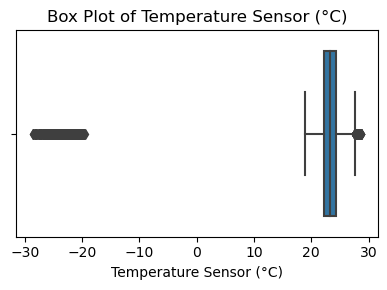

Outliers in Humidity Sensor (%):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 49.67, Upper bound: 88.78


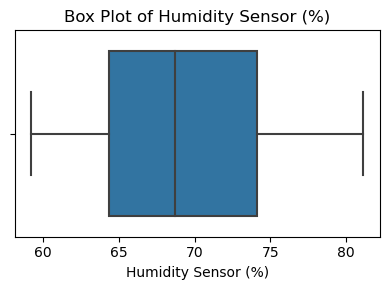

Outliers in Light Intensity Sensor (lux):
Number of outliers: 1279
Percentage of outliers: 2.22%
Lower bound: -187.00, Upper bound: 997.00


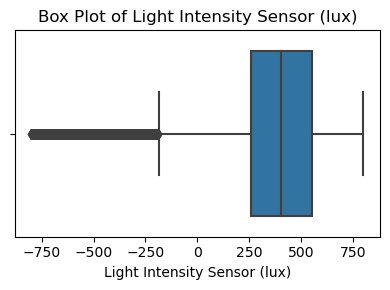

Outliers in CO2 Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 608.00, Upper bound: 1520.00


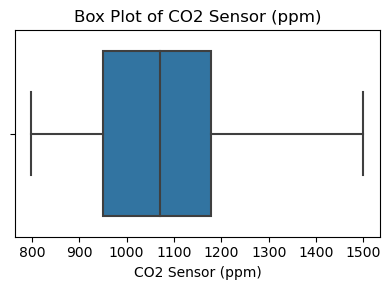

Outliers in EC Sensor (dS/m):
Number of outliers: 870
Percentage of outliers: 1.51%
Lower bound: 0.55, Upper bound: 2.71


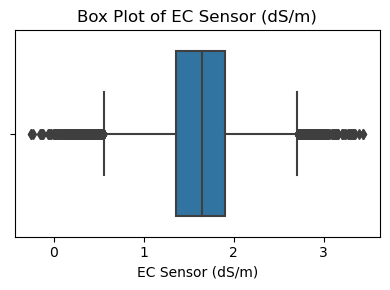

Outliers in O2 Sensor (ppm):
Number of outliers: 4489
Percentage of outliers: 7.81%
Lower bound: 4.50, Upper bound: 8.50


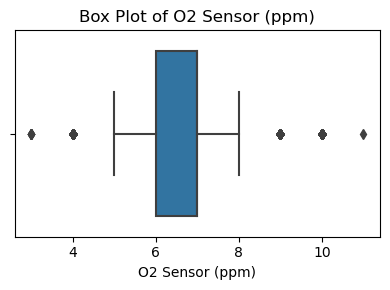

Outliers in pH Sensor:
Number of outliers: 1009
Percentage of outliers: 1.76%
Lower bound: 5.05, Upper bound: 7.05


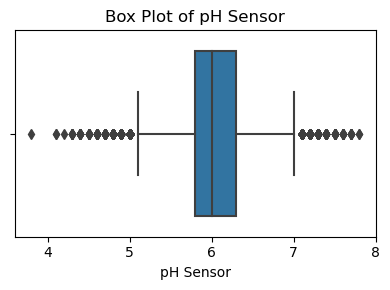

Outliers in Water Level Sensor (mm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 8.28, Upper bound: 43.03


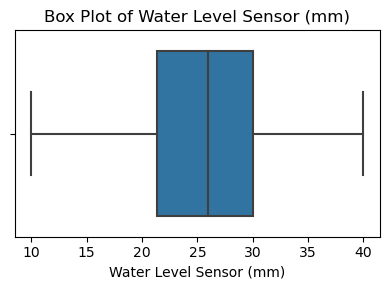

In [173]:
'''
observation:
Out of the 10 numerical attributes, 5 have no outlier.
For attributes with outlier, 4 out of with outlier have less than 2% of outlier. 
While one (O2 Sensor) has 7.89% outlier. 
It might be of interest to AgroTech Innovation to investigate the O2 concentration to enchance its operational efficiency.

'''
# Select numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

#define an empty list to store attributes with outlier. This list will be use to clean outlier.
outlier_cols = []

def plot_boxplot(df, column):
    #get 1st & 3rd quantile of the attributes
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    #intequantile range
    IQR = Q3 - Q1
    #define the lower and upper limits of acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #get the dataframe which the attribute has outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    
    # Create box plots before and after removing outliers
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()
    
    #if attribute has outliers return the name of the attribute
    if len(outliers) > 0 :
        return column
    
for column in numeric_cols:
    outlier_col = plot_boxplot(df, column)
    if outlier_col is not None:
        outlier_cols.append(outlier_col)

## Summary of Data Exploration

**Observation:**
 1. Nutrient (N,P,K) sensors have combination of values consist of numbers (i.e 200) and numbers with unit measurement (i.e.178 ppm).
 2. There are 7 attributes with null values. Of which Humidity Sensor has two-third of its data missing
 3. There are 3 attributes with negative values which are not suspose to.
 4. Plant Type & Plant Stage attributes have values with different captitalization.
 5. System Location Code & Previous Cycle Plant Type attributes have categories count that are almost equally distributed. (little variance)
 6. There are 7489 duplicated rows
   
   
The above observations can be translated into cleaning steps:

**To Do:**

- TODO1: Drop Humidity Sensor as it has alot (67.6%) of missing data
- TODO2: Remove duplicated rows
- TODO3: Remove the unit of measurement (ppm) from the values in Nutrient (N,P,K) sensors attributes and convert them to float data type
- TODO4: Remove the negative values from the 3 attributes
- TODO5: Standardize the capitalization of Plant Type & Plant Stage attributes
- TODO6: Remove null values from the 7 attributes or impute them with mean or median
- TODO7: Remove outliers



## Data Cleaning

### 1. Drop Humidity Sensor 

In [174]:
#TODO1: Drop Humidity Sensor
df.drop(columns=['Humidity Sensor (%)'], inplace = True)

### 2. Remove duplicated rows

In [175]:
#TODO2: Remove duplicated rows
df.drop_duplicates(inplace=True)

### 3. Remove Units from Nurtient (N, P, K) Sensor Attributes 

In [176]:
#TODO3: Remove the unit of measurement (ppm) from the values in Nutrient (N,P,K) sensors attributes

#get Nutrients N, P, K attributes and store them in a list
nutrient_cols = list(filter(lambda col : 'Nutrient' in col, df.columns))

#using a for loop to loop through each column and apply a lambda function.
for col in nutrient_cols:
    #for each value, if the value is None, return null value, else do a split and return only the first elements of the list.
    df[col] = df[col].apply(lambda x : np.nan if x is None else x.split(' ')[0])
    #convert the data type to float, this is needed to plot histogram
    df[col] = df[col].astype('float64')

### 4. Remove the Negative Values from Temperature, Light Intensity and EC Sensors

In [177]:
#TODO4: Remove the negative values from the 3 attributes
def isneg(col):
    
    return df[col].min() < 0

#using filter function to identify the target attributes and store them in a list
columns_with_neg = list(filter(isneg, df.describe().columns))

#get rows with negative values in one of the temperature, light intensity and EC sensors
rows_with_neg_val = df[(df[columns_with_neg] < 0 ).any(axis=1)].index
df.drop(rows_with_neg_val, inplace=True)

### 5. Standardize the Capitalization of Plant Type & Plant Stage attributes

In [178]:
#TODO5: Standardize the capitalization of Plant Type & Plant Stage attributes
#change to title case using lambda
df['Plant Stage'] = df['Plant Stage'].apply(lambda x : x.title())
df['Plant Type'] = df['Plant Type'].apply(lambda x : x.title())

### 6a. Handling Null Values

In [179]:
#TODO6: Remove null values from the 7 attributes or impute them with mean or median
'''
If I remove the entire records with null values, half of the dataset is lost. 
filling null values with average or median is more logical step.

'''

data_lost_pct = round((1 - df.dropna().shape[0]/df.shape[0]) * 100, 1)
print(f'{data_lost_pct}% of the data is lost if all null values are removed')

53.9% of the data is lost if all null values are removed


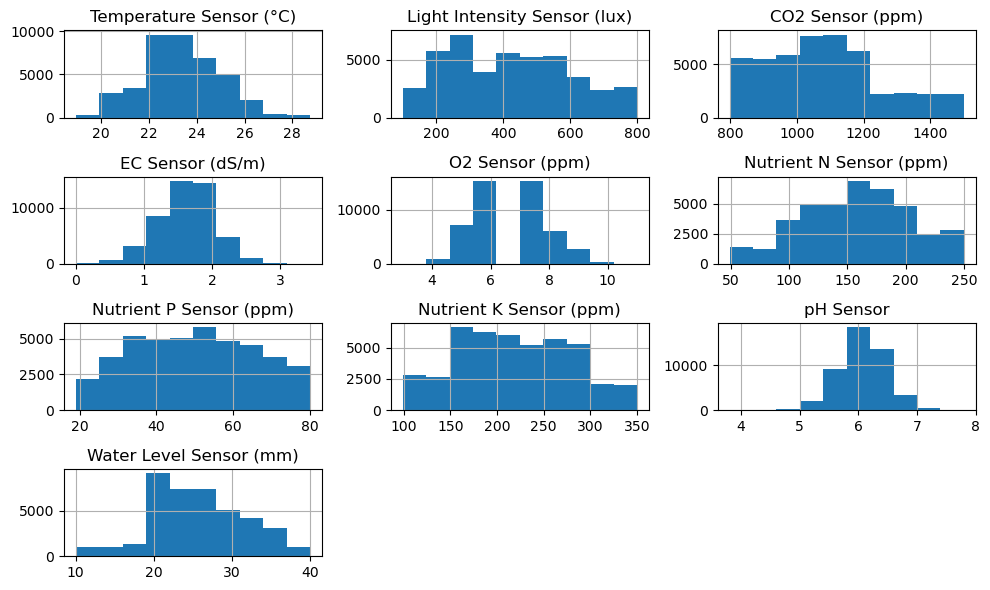

Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count                40,350.00                     44,134.00   
mean                     23.33                        420.08   
std                       1.62                        178.50   
min                      18.93                         99.00   
25%                      22.23                        266.00   
50%                      23.26                        411.00   
75%                      24.39                        557.00   
max                      28.75                        800.00   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count         47,762.00         47,762.00        47,762.00   
mean           1,083.28              1.63             6.58   
std              172.61              0.41             1.15   
min              799.00              0.00             3.00   
25%              950.00              1.36             6.00   
50%            1,071.00              1.65             7.00   
75%            1,178.00              1.90             7.00   
max            1,500.00              3.44            11.00   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count                39,458.00                43,018.00   
mean                    157.84                    49.88   
std                      45.67                    15.41   
min                      49.00                    19.00   
25%                     124.00                    37.00   
50%                     158.00                    50.00   
75%                     190.00                    62.00   
max                     250.00                    80.00   

       Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
count                44,682.00  47,762.00                40,585.00  
mean                    218.11       6.02                    25.72  
std                      60.75       0.40                     5.83  
min                      99.00       3.80                    10.00  
25%                     170.00       5.80                    21.32  
50%                     215.00       6.00                    26.00  
75%                     266.00       6.30                    30.00  
max                     350.00       7.80                    40.00

In [180]:

'''
based on the output, it seems like Nurtirent (N, P, K) are quite normally distributed.
the median and average are very close. i will use average to impute the null values for these 3 Nutrient (N,P,K) attributes.

'''
# Plot histograms and df.describe to see the statiscal summary
numerical_cols = df[df.describe().columns]
numerical_cols.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

df.describe()

### 6b. Impute Null Values

In [181]:
#using for loop to impute mean to missing values of each Nurtient attribute
for col in nutrient_cols:

    # Calculate the mean of the column, ignoring NaN values
    column_mean = df[col].mean()
    # Impute missing values with mean
    df[col].fillna(column_mean, inplace=True)
    
for col in ['Temperature Sensor (°C)', 'Light Intensity Sensor (lux)','Water Level Sensor (mm)']:
    # Calculate the median of the column, ignoring NaN values
    column_median = df[col].median()
    # Impute missing values with median
    df[col].fillna(column_median, inplace=True)

In [182]:
# Plot histograms
df.isna().any()

System Location Code            False
Previous Cycle Plant Type       False
Plant Type                      False
Plant Stage                     False
Temperature Sensor (°C)         False
Light Intensity Sensor (lux)    False
CO2 Sensor (ppm)                False
EC Sensor (dS/m)                False
O2 Sensor (ppm)                 False
Nutrient N Sensor (ppm)         False
Nutrient P Sensor (ppm)         False
Nutrient K Sensor (ppm)         False
pH Sensor                       False
Water Level Sensor (mm)         False
dtype: bool

### 7. Remove Outliers

Outliers in Temperature Sensor (°C):
Number of outliers: 1147
Percentage of outliers: 2.40%
Lower bound: 19.950000000000003, Upper bound: 26.590000000000003


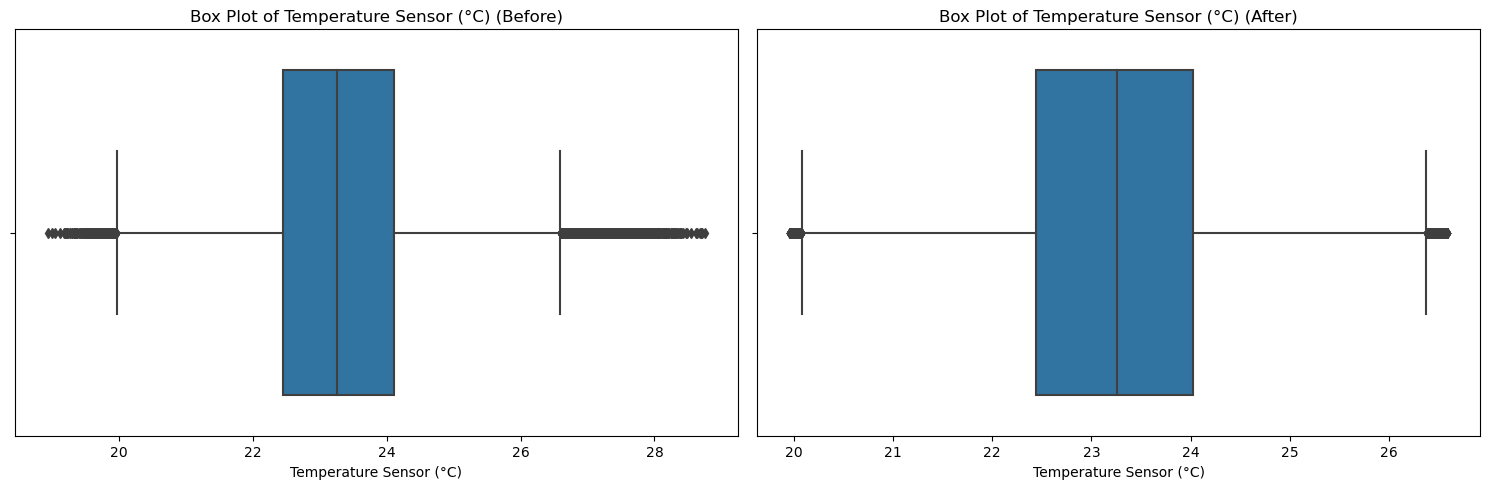

Shape before removing outliers: (47762, 14)
Shape after removing outliers: (46615, 14)


Outliers in Light Intensity Sensor (lux):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -124.5, Upper bound: 935.5


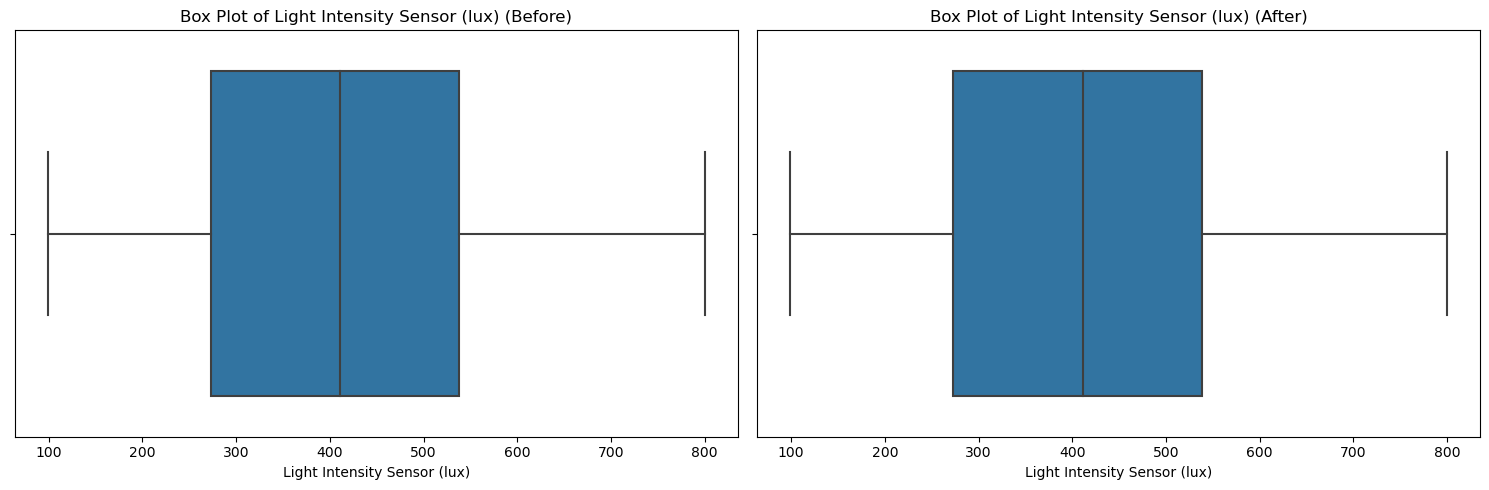

Shape before removing outliers: (46615, 14)
Shape after removing outliers: (46615, 14)


Outliers in CO2 Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 606.0, Upper bound: 1518.0


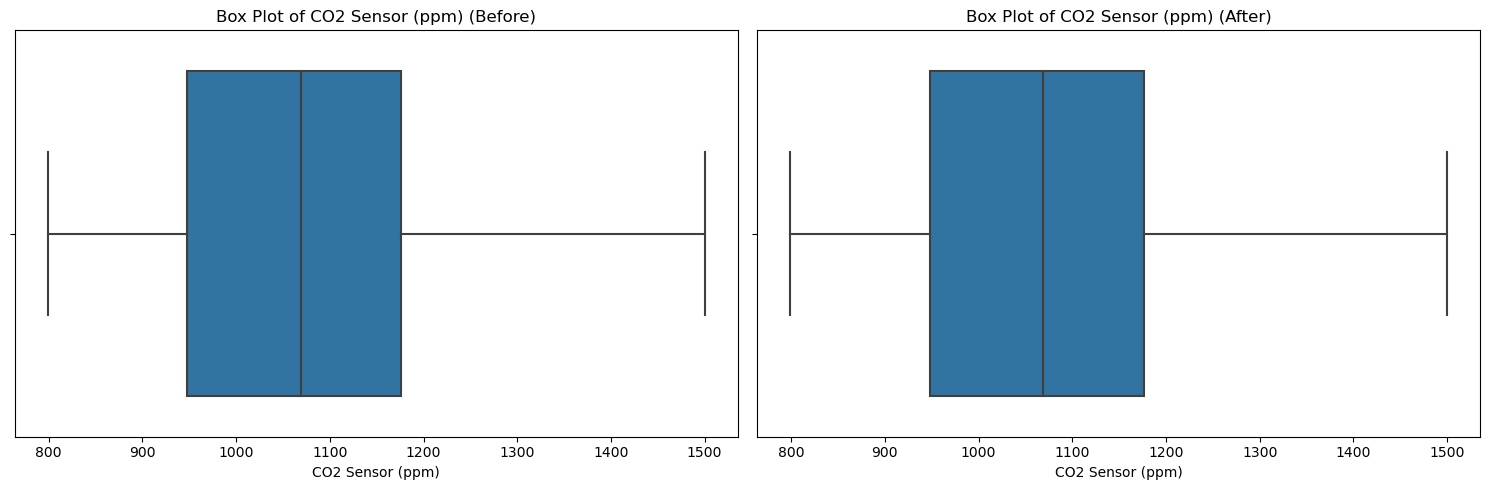

Shape before removing outliers: (46615, 14)
Shape after removing outliers: (46615, 14)


Outliers in EC Sensor (dS/m):
Number of outliers: 680
Percentage of outliers: 1.46%
Lower bound: 0.5500000000000004, Upper bound: 2.7099999999999995


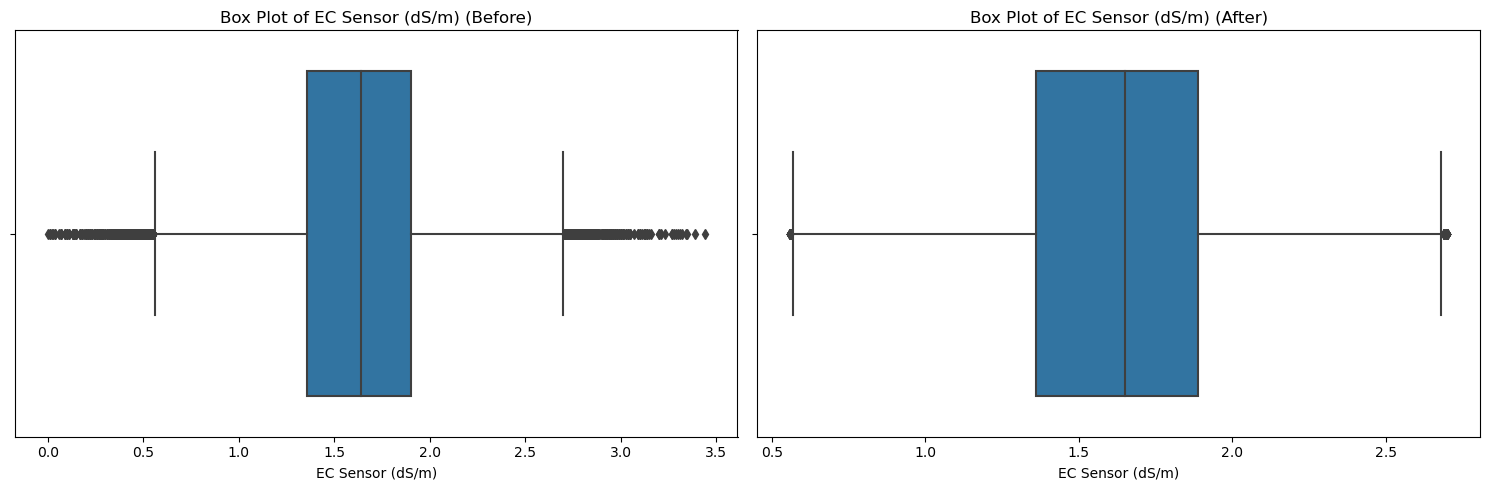

Shape before removing outliers: (46615, 14)
Shape after removing outliers: (45935, 14)


Outliers in O2 Sensor (ppm):
Number of outliers: 3462
Percentage of outliers: 7.54%
Lower bound: 4.5, Upper bound: 8.5


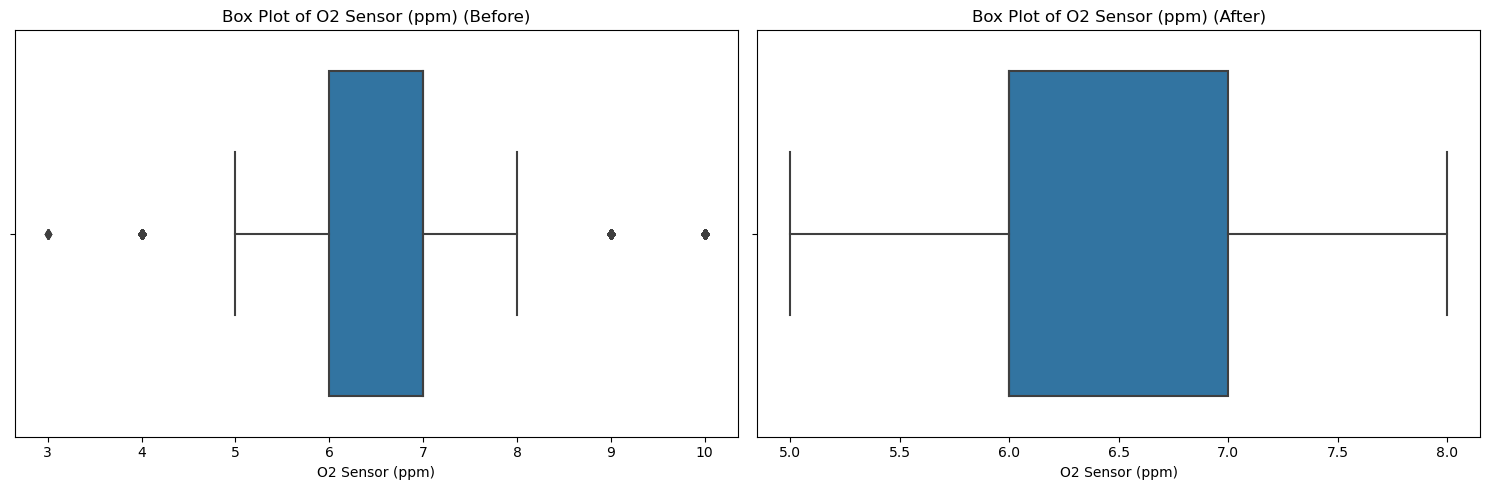

Shape before removing outliers: (45935, 14)
Shape after removing outliers: (42473, 14)


Outliers in Nutrient N Sensor (ppm):
Number of outliers: 214
Percentage of outliers: 0.50%
Lower bound: 52.0, Upper bound: 260.0


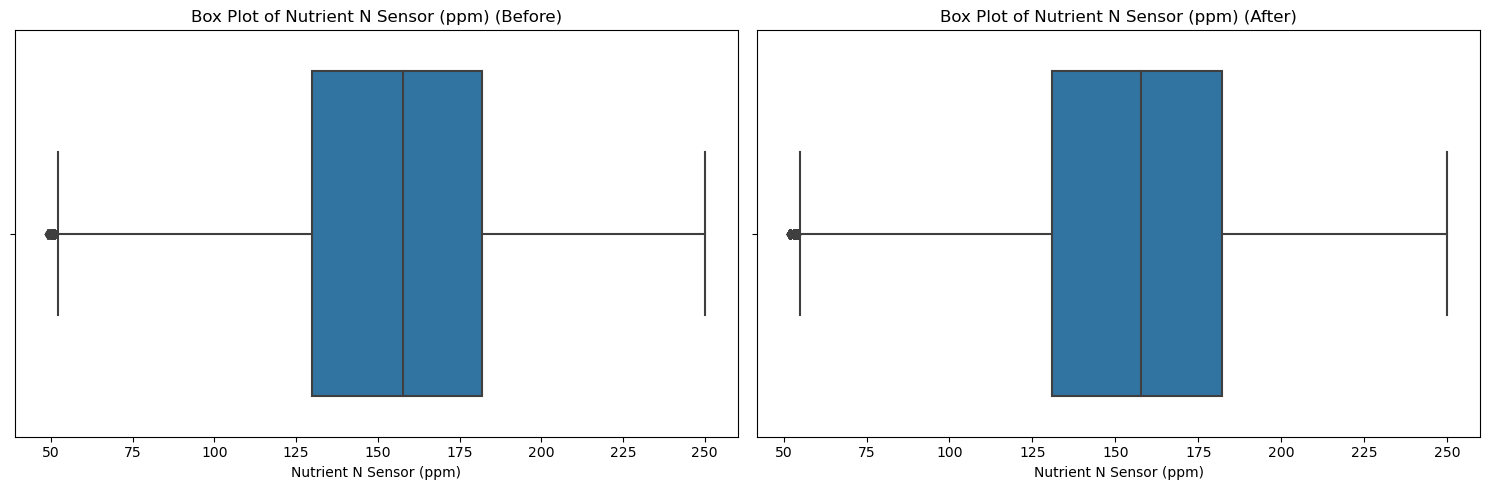

Shape before removing outliers: (42473, 14)
Shape after removing outliers: (42259, 14)


Outliers in Nutrient P Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 5.0, Upper bound: 93.0


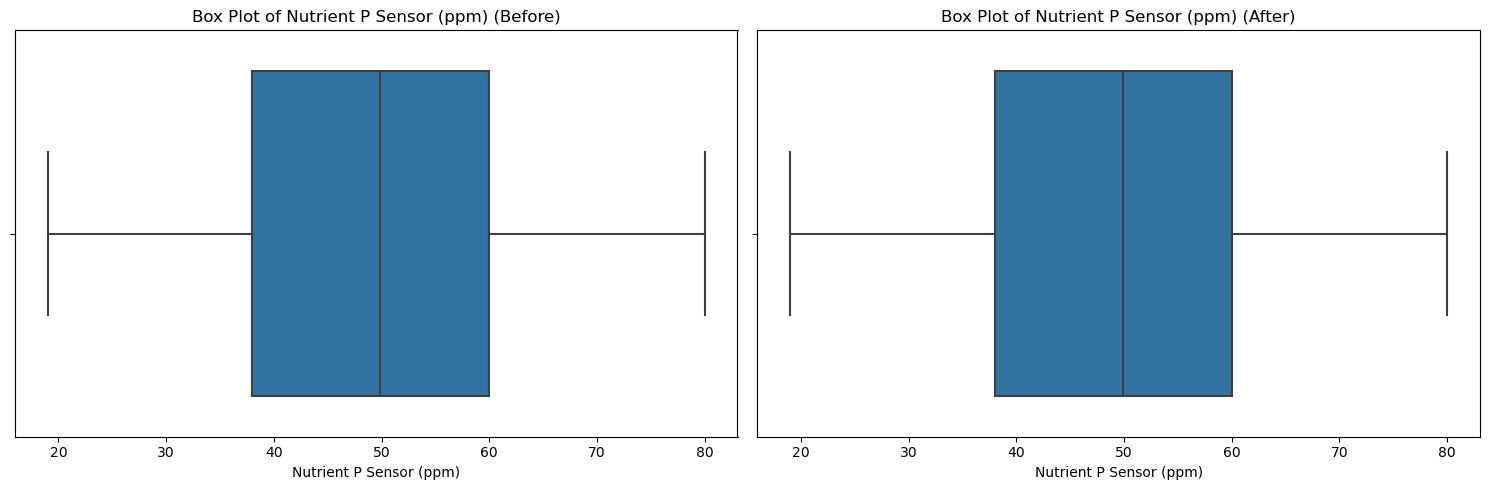

Shape before removing outliers: (42259, 14)
Shape after removing outliers: (42259, 14)


Outliers in Nutrient K Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 34.5, Upper bound: 398.5


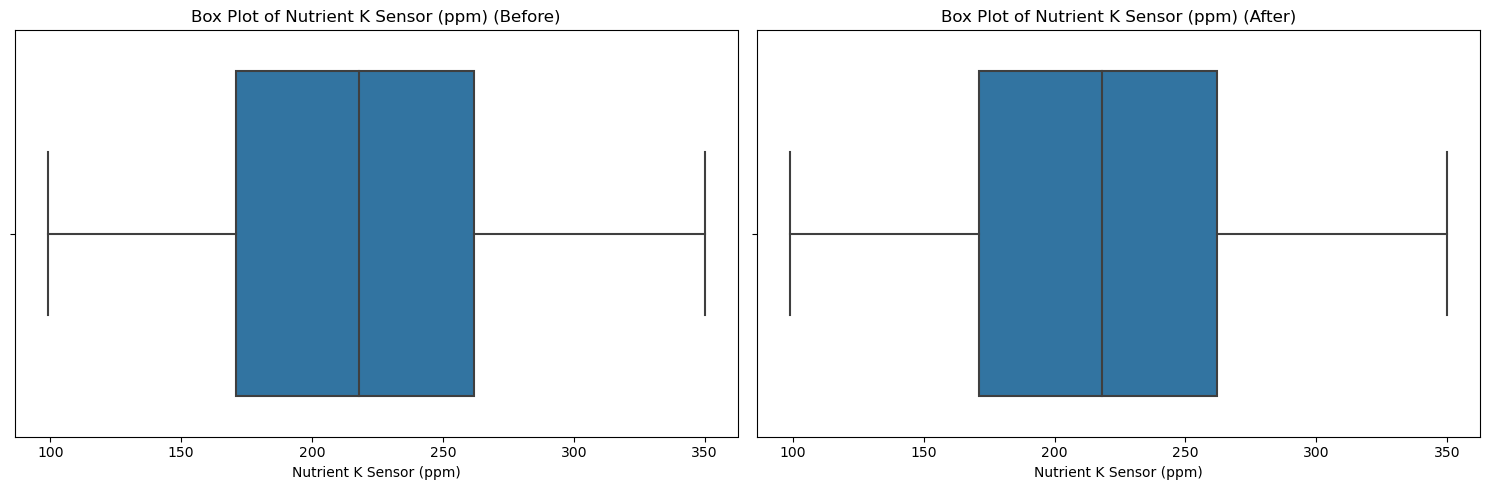

Shape before removing outliers: (42259, 14)
Shape after removing outliers: (42259, 14)


Outliers in pH Sensor:
Number of outliers: 734
Percentage of outliers: 1.74%
Lower bound: 5.05, Upper bound: 7.05


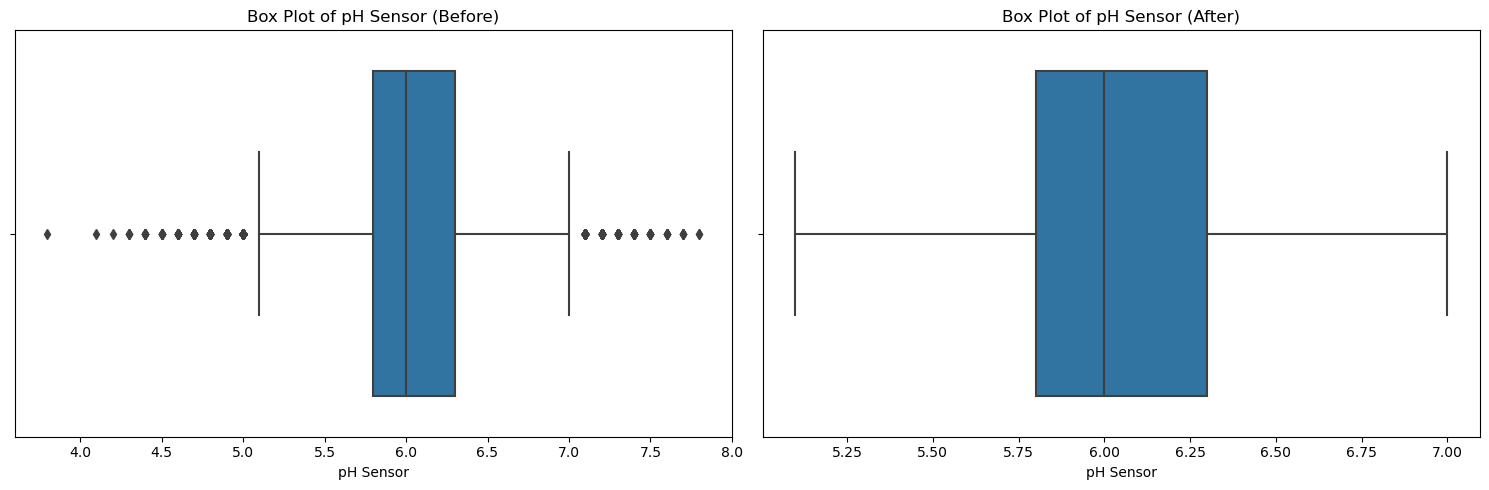

Shape before removing outliers: (42259, 14)
Shape after removing outliers: (41525, 14)


Outliers in Water Level Sensor (mm):
Number of outliers: 549
Percentage of outliers: 1.32%
Lower bound: 11.5, Upper bound: 39.5


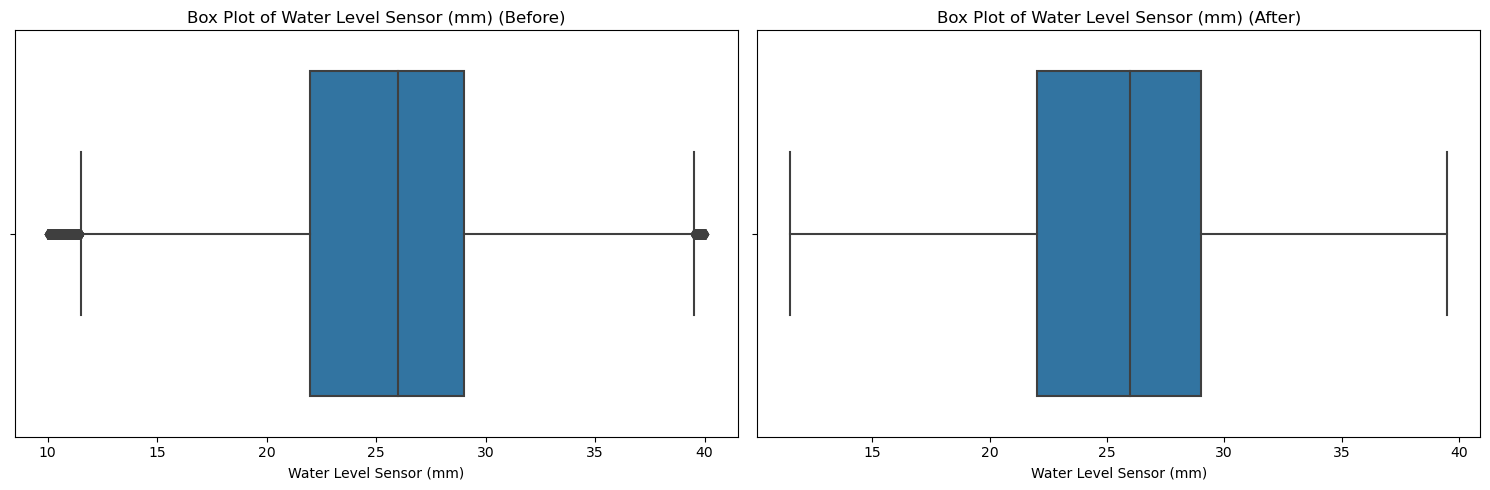

Shape before removing outliers: (41525, 14)
Shape after removing outliers: (40976, 14)


Final shape of the DataFrame after removing outliers from all columns: (40976, 14)


In [183]:
def check_and_remove_outliers(df, column, plot=True):
    #get 1st & 3rd quantile of the attributes
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    #intequantile range
    IQR = Q3 - Q1
    
    #define the lower and upper limits of acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #get the dataframe which the attribute has outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    #a parameter to choose whether to plot boxplot, if true plot bloxplot
    if plot:
        # Create box plots before and after removing outliers
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        sns.boxplot(x=df[column], ax=ax1)
        ax1.set_title(f'Box Plot of {column} (Before)')
        
        df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        sns.boxplot(x=df_no_outliers[column], ax=ax2)
        ax2.set_title(f'Box Plot of {column} (After)')
        
        plt.tight_layout()
        plt.show()
    
    #remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"Shape before removing outliers: {df.shape}")
    print(f"Shape after removing outliers: {df_no_outliers.shape}")
    print("\n")
    
    return df_no_outliers

#check and remove outliers for each outlier column
numeric_cols = df.select_dtypes(include=[np.number]).columns
for column in numeric_cols:
    df = check_and_remove_outliers(df, column, plot=True)

#after removing outliers from all columns, df will contain the cleaned data
print("Final shape of the DataFrame after removing outliers from all columns:", df.shape)

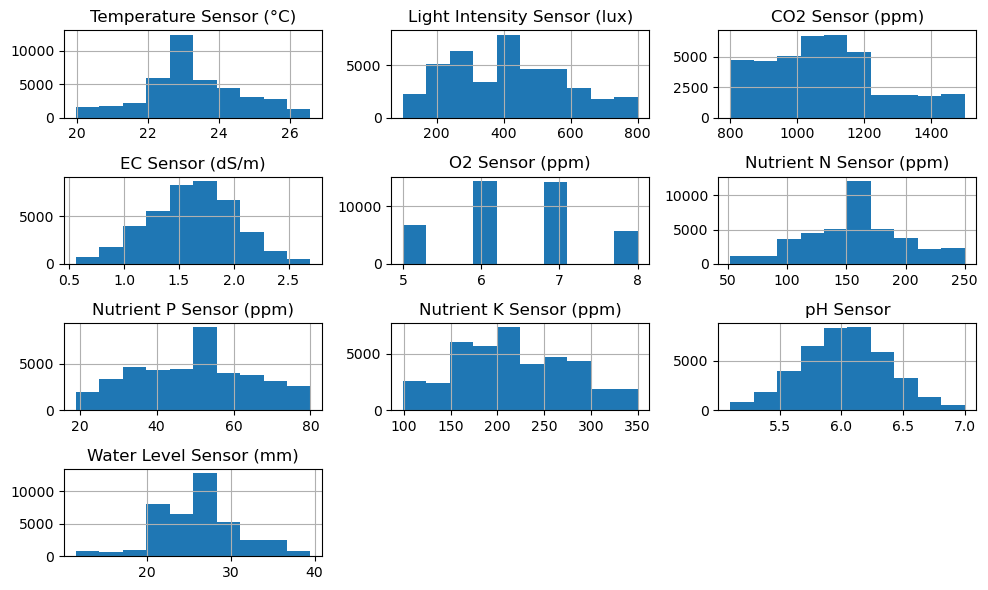

Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count                40,976.00                     40,976.00   
mean                     23.29                        412.72   
std                       1.36                        168.59   
min                      19.96                         99.00   
25%                      22.48                        270.00   
50%                      23.26                        411.00   
75%                      24.04                        535.00   
max                      26.59                        800.00   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count         40,976.00         40,976.00        40,976.00   
mean           1,082.70              1.62             6.46   
std              171.03              0.39             0.92   
min              799.00              0.56             5.00   
25%              952.00              1.35             6.00   
50%            1,072.00              1.64             6.00   
75%            1,177.00              1.89             7.00   
max            1,500.00              2.70             8.00   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count                40,976.00                40,976.00   
mean                    156.86                    49.47   
std                      41.28                    14.62   
min                      52.00                    19.00   
25%                     130.00                    38.00   
50%                     157.84                    49.88   
75%                     182.00                    60.00   
max                     250.00                    80.00   

       Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
count                40,976.00  40,976.00                40,976.00  
mean                    216.80       6.02                    25.88  
std                      59.72       0.37                     4.96  
min                      99.00       5.10                    11.50  
25%                     171.00       5.80                    22.00  
50%                     218.11       6.00                    26.00  
75%                     262.00       6.30                    29.00  
max                     350.00       7.00                    39.50

In [184]:
# Plot histograms
numerical_cols = df[df.describe().columns]
numerical_cols.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

df.describe()

## Bivarate Analysis

- Now the data is clean we will do a bivariate analysis for the target (Temperature) against the features variables

### Correlation Matrix

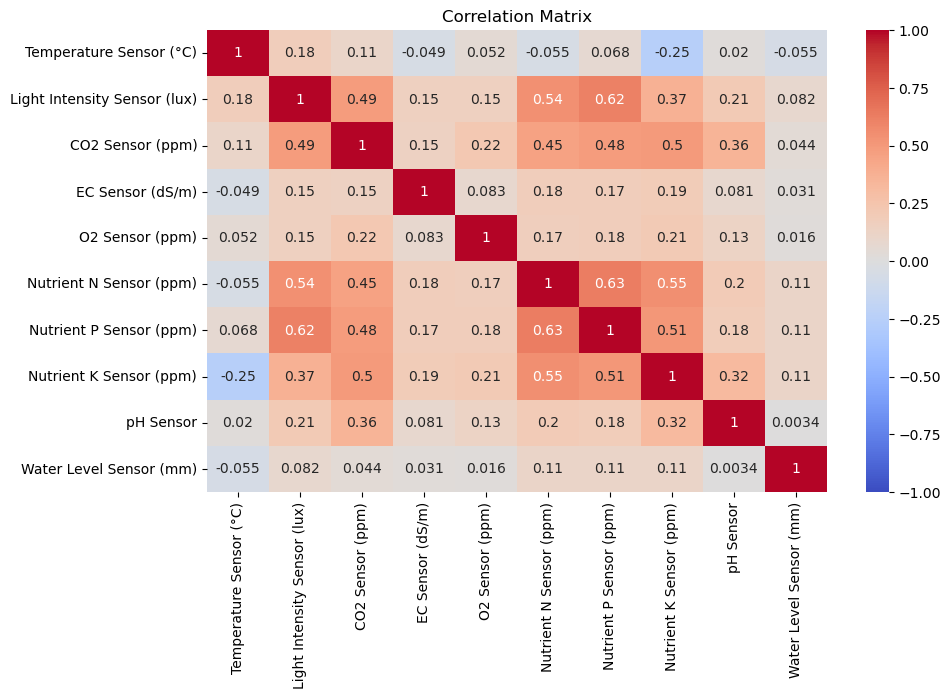

In [185]:
'''
observation:

Looking at correlation among the features (all attribute except Temperature). The Nutrient(N,P,K) seems to be fairly correlated.
One way is to drop the one of them to see if the correlation changes. Another approach is combine these 3 attributes into
one with its average value. I will do the latter. My assumption is that fertilizer mostly comes in NPK ratio so i think 
it is fine to aggregate them with average.

Looking at the correlationship between Temperature and each of the features, it seems that each of the feature's correlationship
with Temperature is low, ranging from -0.24 to 24. This suggest that linear machine model such as linear regression or 
Support Vector Machines (SVMs) with Linear Kernel are not suitable to train the dataset.
'''

#create the correlation matrix
corr = df.corr()

#create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

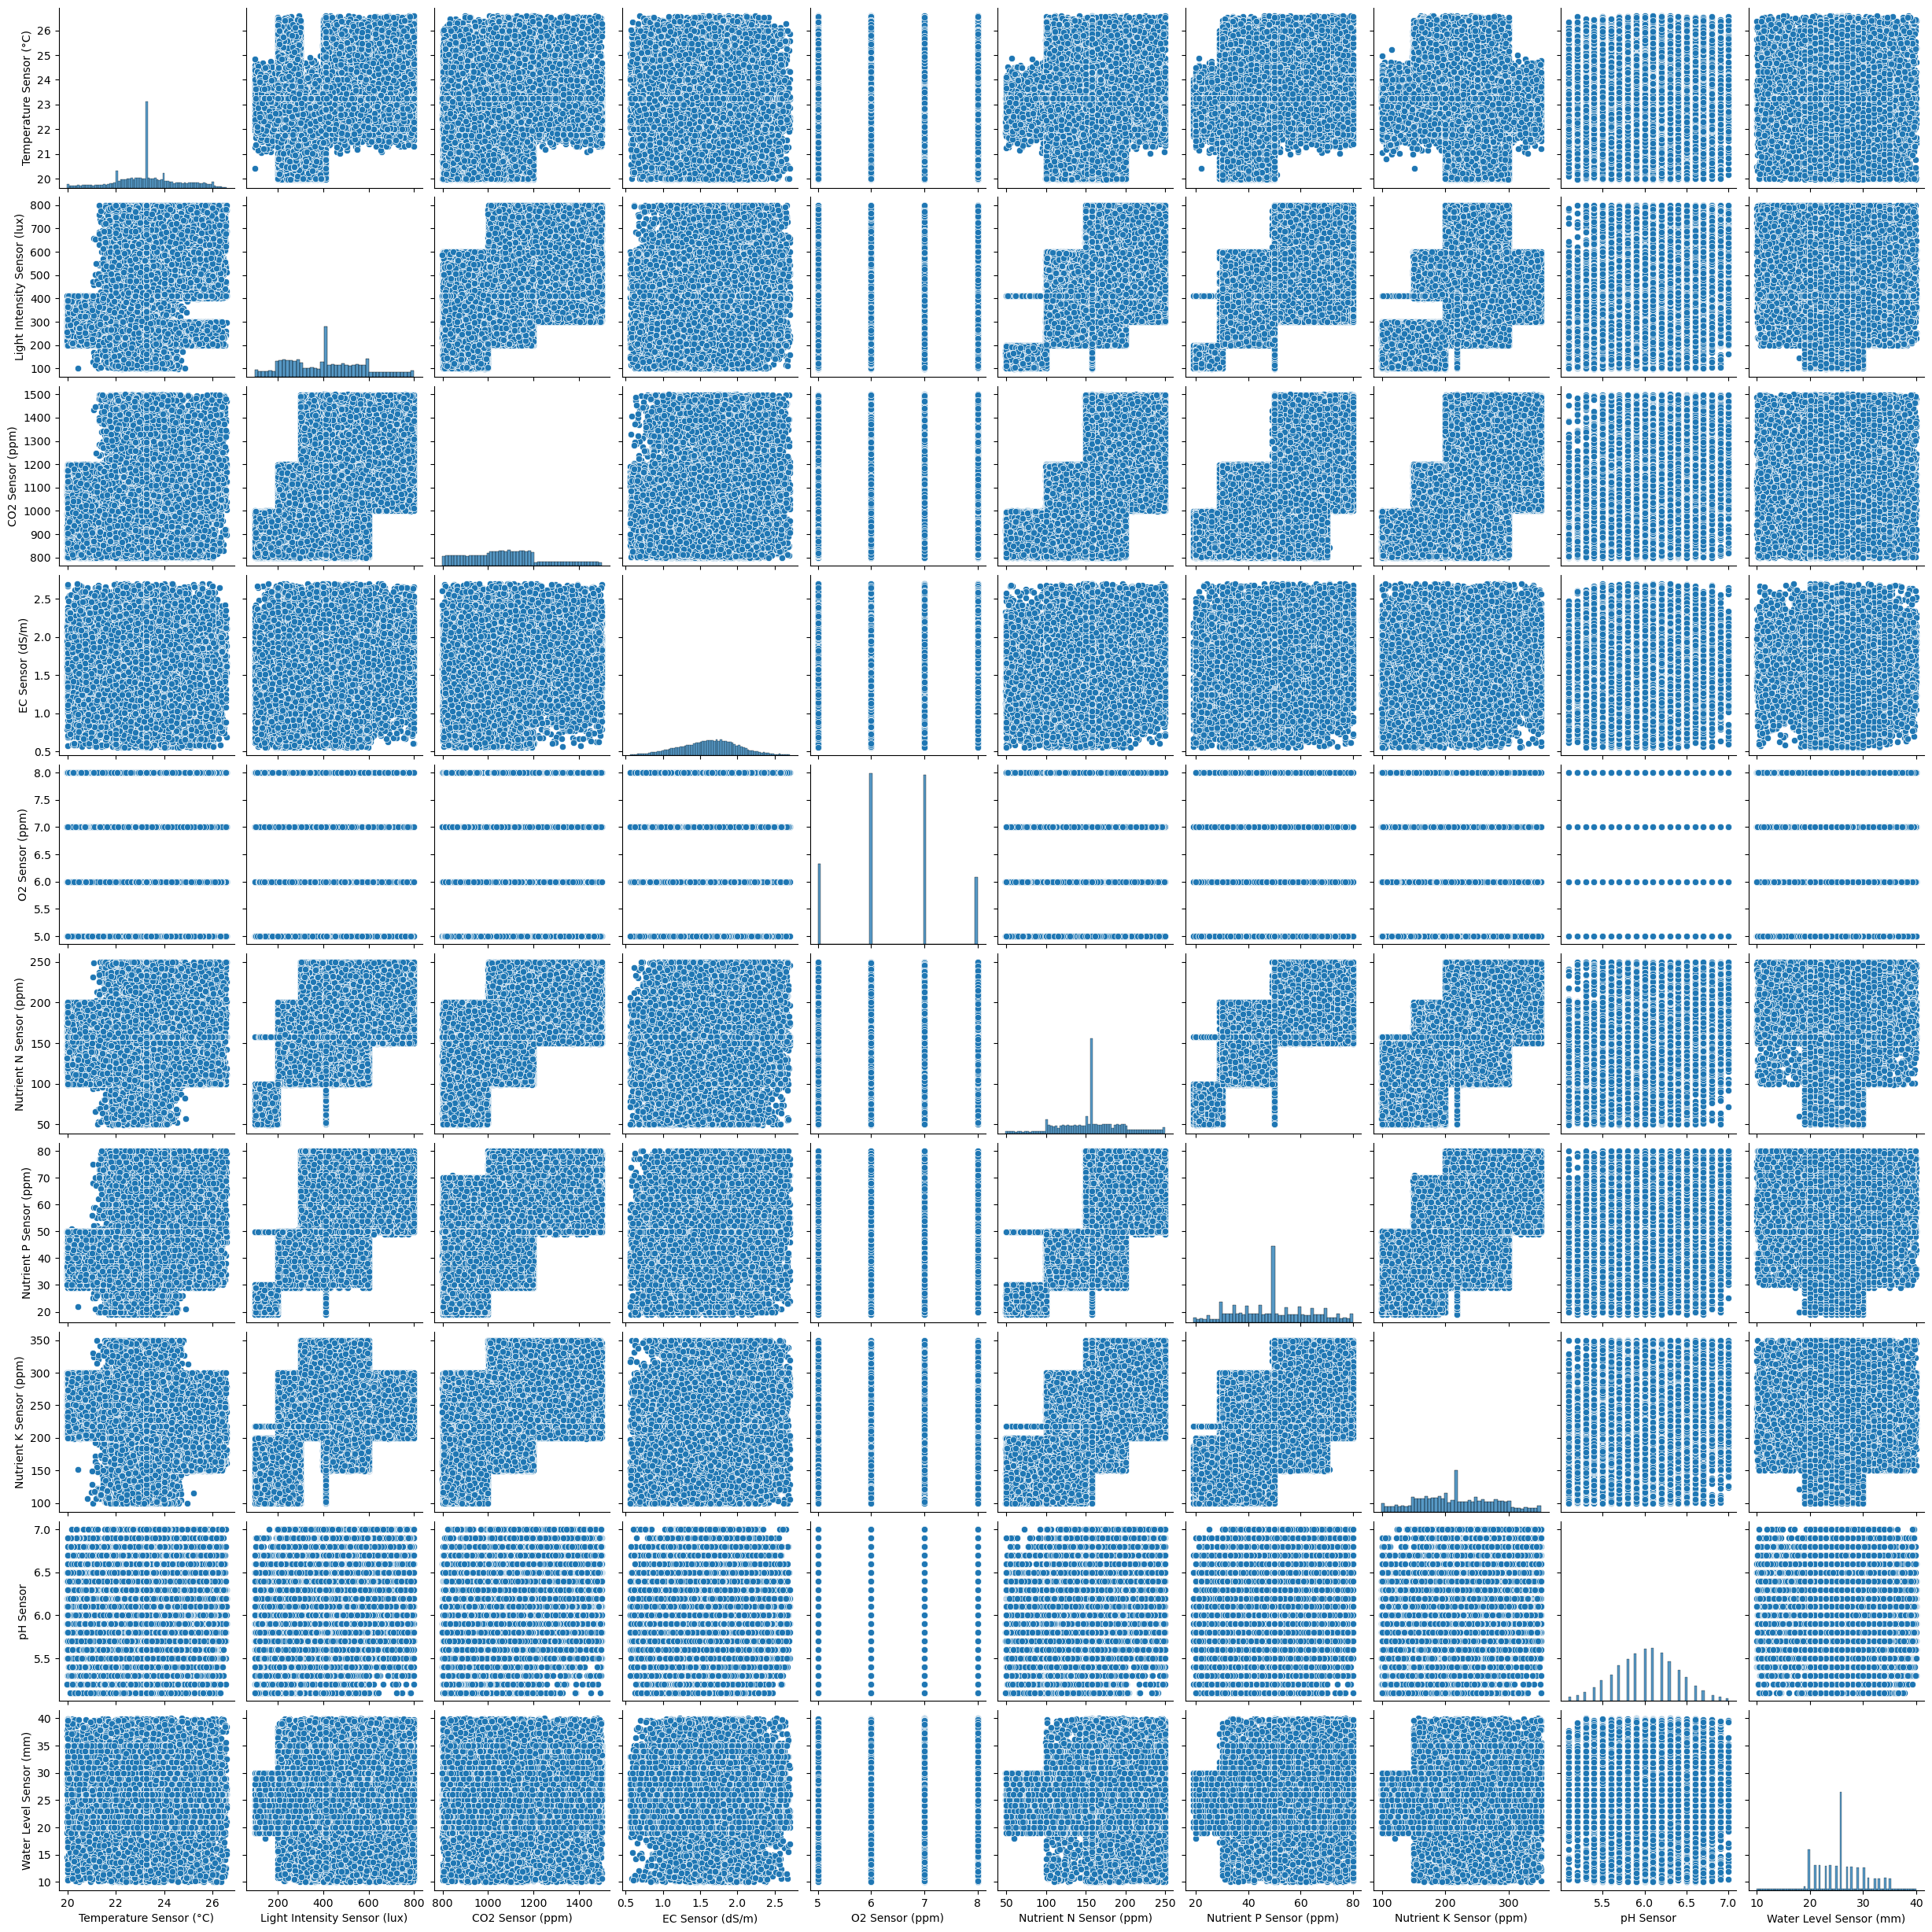

In [139]:
'''
observation:
looking at the first column of the pairplot affirms that there is no obvious linear relationship between each of the features 
and Temperature (target variable)
'''
#ploting pairplot
sns.pairplot(df)

### Temperature Against Categorical Data

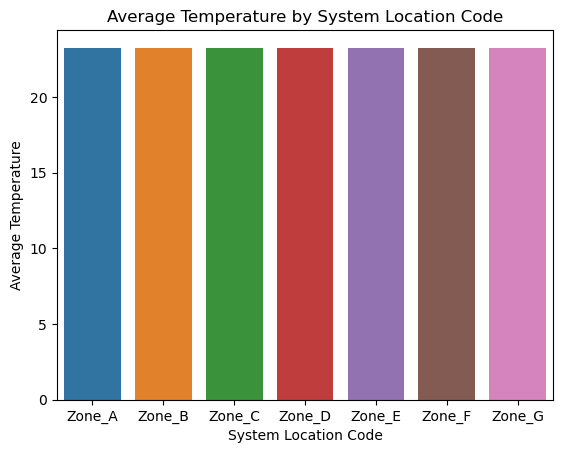

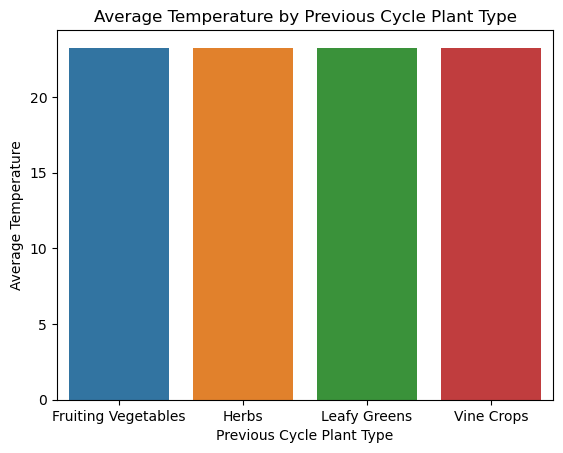

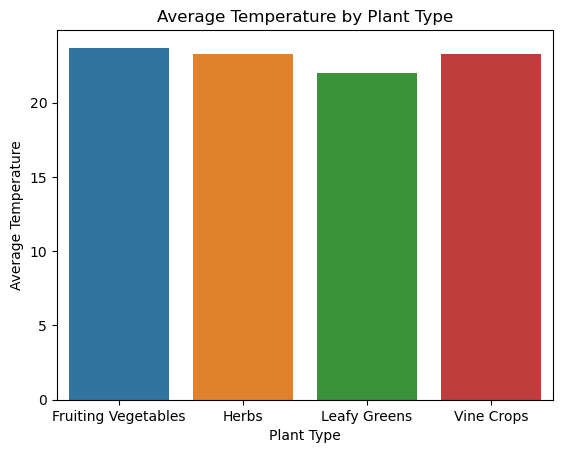

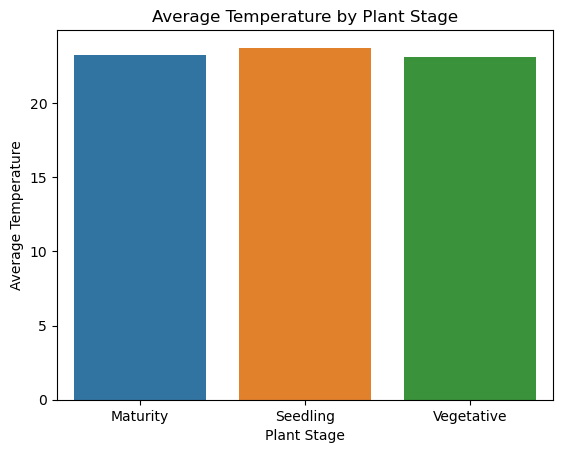

In [186]:
'''
observation:
The plots show constant average value for attributes Previous Cycle Plant Type and System Location Code. 
This suggest that these two attributes have no predictive power against Temperature as there are no variability 
and correlationship.

Plant Type and Plant Stage does varies in temperature.
'''
#ploting 
categorical_cols = df.select_dtypes(include=['object'])

for col in categorical_cols:
# Calculate average temperature for each location
    average_temperatures = df.groupby(col)['Temperature Sensor (°C)'].median()

    # Create the bar plot using Seaborn
    sns.barplot(x=average_temperatures.index, y=average_temperatures.values)
    plt.ylabel('Average Temperature')
    plt.xlabel(f'{col}')
    plt.title(f'Average Temperature by {col}')
    plt.show()

### Data Transformation

In [187]:
df

System Location Code Previous Cycle Plant Type           Plant Type  \
2                   Zone_F                     Herbs                Herbs   
3                   Zone_G                     Herbs  Fruiting Vegetables   
5                   Zone_C                Vine Crops  Fruiting Vegetables   
6                   Zone_A              Leafy Greens           Vine Crops   
9                   Zone_B                Vine Crops           Vine Crops   
...                    ...                       ...                  ...   
57481               Zone_F                Vine Crops         Leafy Greens   
57483               Zone_G                     Herbs                Herbs   
57484               Zone_C                Vine Crops  Fruiting Vegetables   
57487               Zone_G       Fruiting Vegetables           Vine Crops   
57488               Zone_F       Fruiting Vegetables         Leafy Greens   

      Plant Stage  Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
2        Maturity                    23.84                        562.00   
3      Vegetative                    22.61                        651.00   
5        Maturity                    25.96                        675.00   
6        Maturity                    23.26                        514.00   
9        Maturity                    25.59                        435.00   
...           ...                      ...                           ...   
57481    Maturity                    20.70                        371.00   
57483    Seedling                    25.79                        262.00   
57484    Maturity                    23.26                        619.00   
57487  Vegetative                    23.45                        502.00   
57488    Maturity                    20.00                        391.00   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
2                  1246              1.21                8   
3                  1346              1.96                6   
5                  1338              1.75                8   
6                  1103              1.14                8   
9                   845              2.07                8   
...                 ...               ...              ...   
57481              1183              2.59                7   
57483              1115              1.36                6   
57484              1074              1.95                6   
57487               911              2.27                5   
57488               864              1.90                7   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
2                       228.00                    79.00   
3                       157.84                    53.00   
5                       227.00                    53.00   
6                       174.00                    62.00   
9                       150.00                    70.00   
...                        ...                      ...   
57481                   165.00                    32.00   
57483                   147.00                    34.00   
57484                   150.00                    61.00   
57487                   190.00                    57.00   
57488                   108.00                    40.00   

       Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
2                       292.00       6.40                    26.00  
3                       289.00       6.60                    26.00  
5                       258.00       6.20                    23.09  
6                       217.00       5.50                    35.00  
9                       210.00       5.30                    27.84  
...                        ...        ...                      ...  
57481                   259.00       6.10                    34.00  
57483                   186.00       6.30                    27.00  
57484                   210.00       6.40                    26.00  
57487                   

## Summary of Bivarate Analysis

**Observation**
- Previous Cycle Plant Type and System Location Code have no predictive power against Temperature as there are no variability 
and correlationship
- The features Nutrient(N,P,K) are correlated.

The above observations can be translated into data transformation steps:

**To-do-list**
- Combine the 3 attributes Nurtient N,P,K into one with their average
- Concat attributes Plant Type and Plant Stage as one (For the second model to categorise the combined "Plant Type-Stage")

**Columns excluded for Machine Learning**

1. Humidity Sensor (%)
2. Nutrient N Sensor (ppm)
3. Nutrient P Sensor (ppm)
4. Nutrient K Sensor (ppm)
5. Previous Cycle Plant Type
6. System Location Code
7. Plant Type
8. Plant Stage

**Columns created for Machine Learning**
1. Nutrient NPK Sensors (ppm)
2. Plant Type-Stage

In [188]:
#Combine the 3 attributes Nurtient N,P,K into one with their average
df['Nutrient NPK Sensors (ppm)'] = df[nutrient_cols].mean(axis=1)

#Concat attributes Plant Type and Plant Stage as one
df['Plant Type-Stage'] = df['Plant Type'] + ' ' + df['Plant Stage']

In [189]:
cols_to_be_dropped = ['System Location Code', 'Previous Cycle Plant Type', 
                      'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)',
                      'Nutrient K Sensor (ppm)', 'pH Sensor']

df.drop(columns=cols_to_be_dropped, inplace=True)

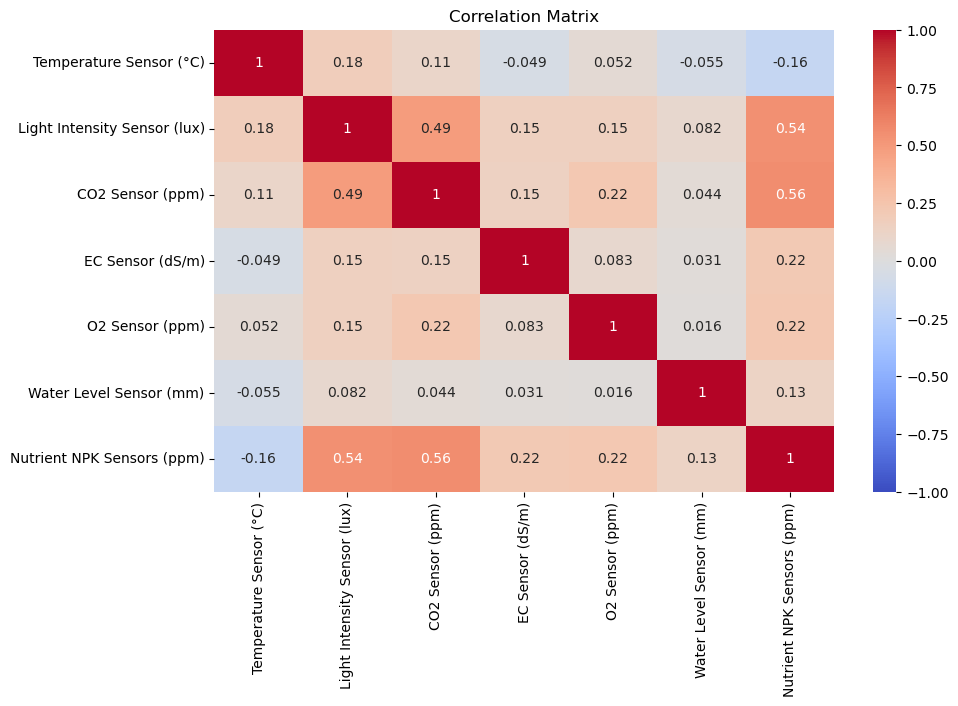

In [190]:
#to look at matrix again after data transformation
#create the correlation matrix
corr = df.corr()

#create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [77]:
df

Plant Type Plant Stage  Temperature Sensor (°C)  \
2                    Herbs    Maturity                    23.84   
3      Fruiting Vegetables  Vegetative                    22.61   
5      Fruiting Vegetables    Maturity                    25.96   
9               Vine Crops    Maturity                    25.59   
10                   Herbs    Maturity                    23.15   
...                    ...         ...                      ...   
57480         Leafy Greens    Maturity                    20.74   
57481         Leafy Greens    Maturity                    20.70   
57483                Herbs    Seedling                    25.79   
57487           Vine Crops  Vegetative                    23.45   
57488         Leafy Greens    Maturity                    20.00   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
2                            562.00              1246              1.21   
3                            651.00              1346              1.96   
5                            675.00              1338              1.75   
9                            435.00               845              2.07   
10                           444.00              1090              1.77   
...                             ...               ...               ...   
57480                        367.00               896              1.49   
57481                        371.00              1183              2.59   
57483                        262.00              1115              1.36   
57487                        502.00               911              2.27   
57488                        391.00               864              1.90   

       O2 Sensor (ppm)  Water Level Sensor (mm)  Nutrient NPK Sensors (ppm)  \
2                    8                    26.00                      199.67   
3                    6                   218.11                      166.61   
5                    8                    23.09                      179.33   
9                    8                    27.84                      143.33   
10                   7                    35.00                      185.61   
...                ...                      ...                         ...   
57480                7                   218.11                      124.33   
57481                7                    34.00                      152.00   
57483                6                    27.00                      122.33   
57487                5                    35.00                      147.67   
57488                7                    31.85                      140.33   

                     Plant Type-Stage  
2                      Herbs Maturity  
3      Fruiting Vegetables Vegetative  
5        Fruiting Vegetables Maturity  
9                 Vine Crops Maturity  
10                     Herbs Maturity  
...                               ...  
57480           Leafy Greens Maturity  
57481           Leafy Greens Maturity  
57483                  Herbs Seedling  
57487           Vine Crops Vegetative  
57488           Leafy Greens Maturity  

[35964 rows x 10 columns]

In [191]:
df_plant_type = df.groupby('Plant Type-Stage').agg({'Temperature Sensor (°C)' : 'mean', 'Light Intensity Sensor (lux)' : 'mean',
                                   'CO2 Sensor (ppm)' : 'mean', 'O2 Sensor (ppm)' : 'mean', 
                                   'Water Level Sensor (mm)' : 'mean', 'Nutrient NPK Sensors (ppm)' : 'mean'})

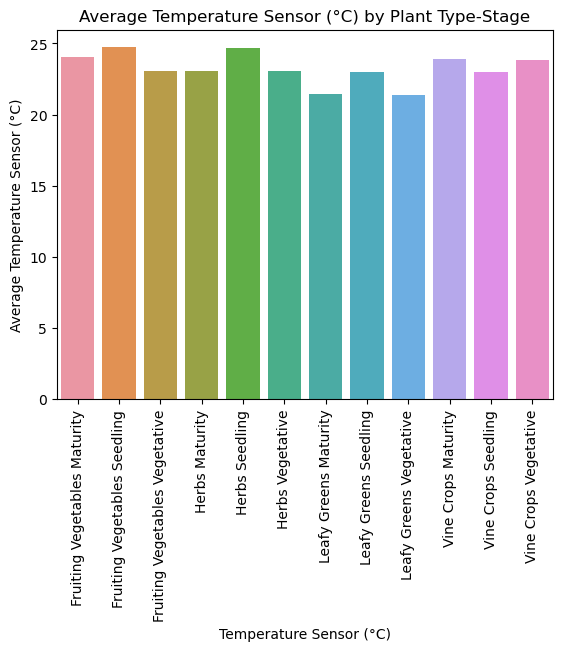

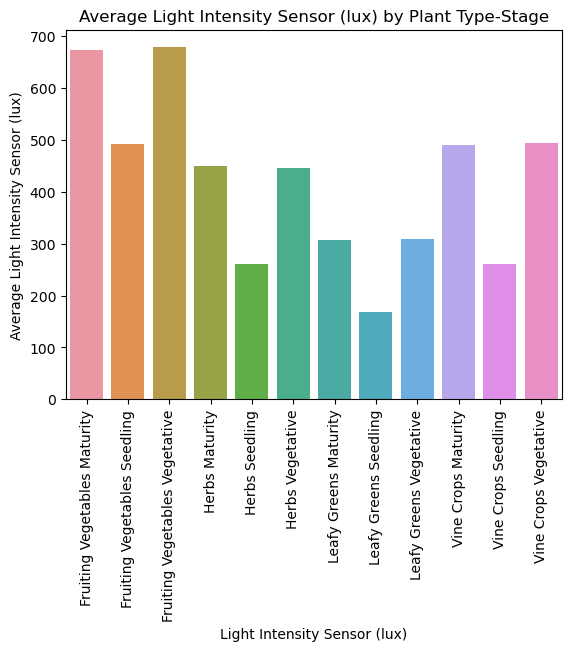

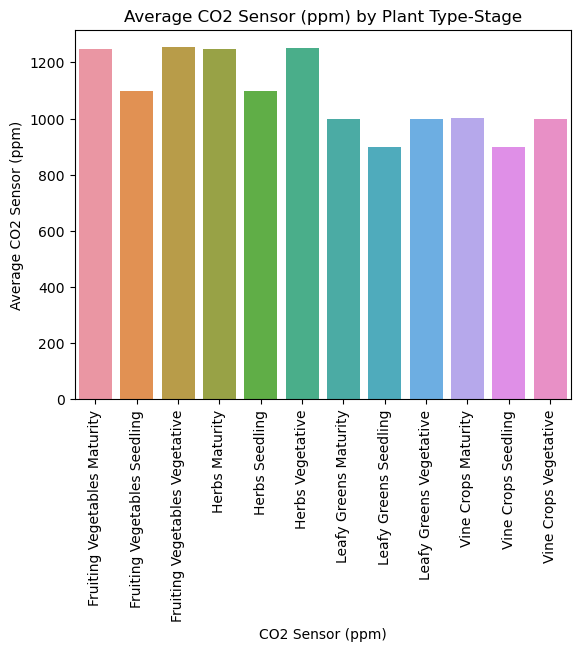

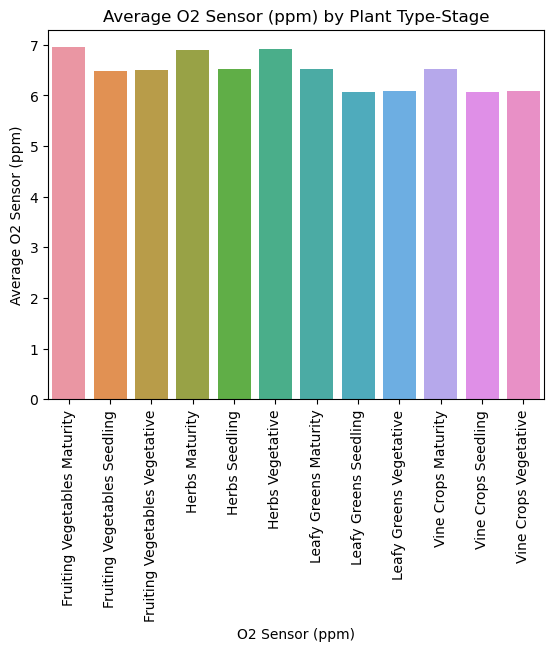

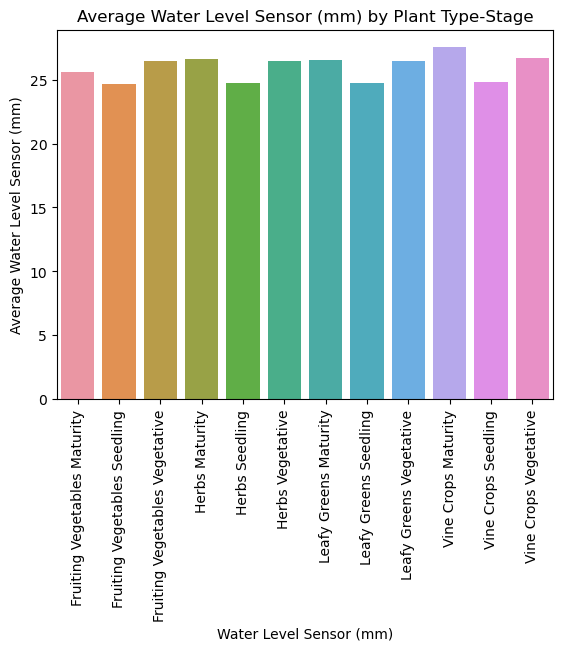

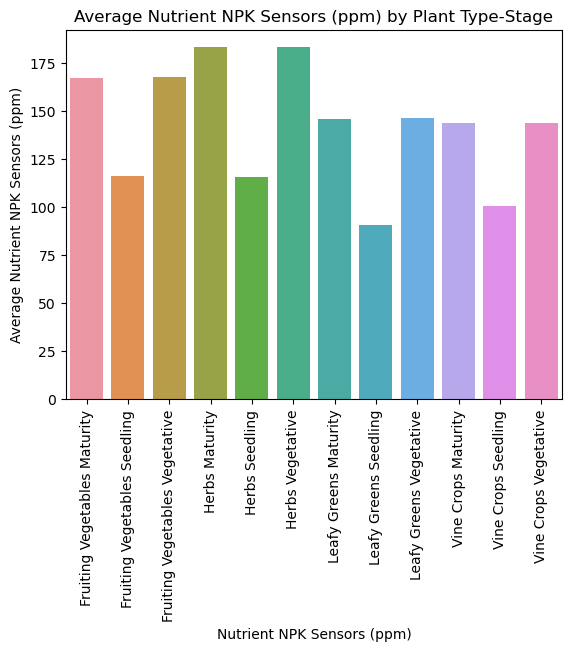

In [192]:
for col in df_plant_type.columns:
    sns.barplot(x=df_plant_type.index, y=df_plant_type[col])
    plt.ylabel(f'Average {col}')
    plt.xlabel(f'{col}')
    plt.title(f'Average {col} by Plant Type-Stage')
    plt.xticks(rotation=90) 
    plt.show()

# Task 2: End-to-end Machine Learning Pipeline

# 1. Develop models to predict the temperature conditions

In [81]:
df


Plant Type Plant Stage  Temperature Sensor (°C)  \
2                    Herbs    Maturity                    23.84   
3      Fruiting Vegetables  Vegetative                    22.61   
5      Fruiting Vegetables    Maturity                    25.96   
9               Vine Crops    Maturity                    25.59   
10                   Herbs    Maturity                    23.15   
...                    ...         ...                      ...   
57480         Leafy Greens    Maturity                    20.74   
57481         Leafy Greens    Maturity                    20.70   
57483                Herbs    Seedling                    25.79   
57487           Vine Crops  Vegetative                    23.45   
57488         Leafy Greens    Maturity                    20.00   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
2                            562.00              1246              1.21   
3                            651.00              1346              1.96   
5                            675.00              1338              1.75   
9                            435.00               845              2.07   
10                           444.00              1090              1.77   
...                             ...               ...               ...   
57480                        367.00               896              1.49   
57481                        371.00              1183              2.59   
57483                        262.00              1115              1.36   
57487                        502.00               911              2.27   
57488                        391.00               864              1.90   

       O2 Sensor (ppm)  Water Level Sensor (mm)  Nutrient NPK Sensors (ppm)  \
2                    8                    26.00                      199.67   
3                    6                   218.11                      166.61   
5                    8                    23.09                      179.33   
9                    8                    27.84                      143.33   
10                   7                    35.00                      185.61   
...                ...                      ...                         ...   
57480                7                   218.11                      124.33   
57481                7                    34.00                      152.00   
57483                6                    27.00                      122.33   
57487                5                    35.00                      147.67   
57488                7                    31.85                      140.33   

                     Plant Type-Stage  
2                      Herbs Maturity  
3      Fruiting Vegetables Vegetative  
5        Fruiting Vegetables Maturity  
9                 Vine Crops Maturity  
10                     Herbs Maturity  
...                               ...  
57480           Leafy Greens Maturity  
57481           Leafy Greens Maturity  
57483                  Herbs Seedling  
57487           Vine Crops Vegetative  
57488           Leafy Greens Maturity  

[35964 rows x 10 columns]

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


# 2. Separate features and target variable
X = df.drop(['Temperature Sensor (°C)', 'Plant Type-Stage'], axis=1)  # Replace 'target_variable' with the actual name
y = df['Temperature Sensor (°C)']

# 3. Define preprocessing steps
# 3.1 One-hot encode the categorical feature
categorical_feature =  ['Plant Type', 'Plant Stage'] # Replace with the actual name
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# 3.2 Scale the numerical features
numerical_features = X.select_dtypes(include=['number']).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 3.3 Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_feature)
    ])

# 4. Create the pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42, max_depth=7, criterion='squared_error', 
                                            learning_rate=0.1, n_estimators=50))  # Use SVR with RBF kernel  # You can adjust hyperparameters here
])

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the pipeline
rf_pipeline.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:3f}")
print(f"R-squared: {r2:.3f}")

Mean Squared Error: 0.809858
R-squared: 0.563


In [83]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42, max_depth=7, criterion='squared_error', 
                                            learning_rate=0.1, n_estimators=50))  # You can adjust hyperparameters here
])

In [84]:
GradientBoostingRegressor
Mean Squared Error: 0.8656927110375512
R-squared: 0.6592101796696019

SyntaxError: invalid syntax (1297540755.py, line 2)

## 2. Develop models to categorise the combined "Plant Type-Stage"

## Deep Learning Using Keras

In [94]:
#df.drop(columns=['Plant Type-Stage Label'],inplace=True)
#df.reset_index(drop=True, inplace=True)

#transform into a categorical variable
df['Plant Type-Stage'] = pd.Categorical(df['Plant Type-Stage'])

#one-hot encode the 'Plant Type-Stage' column
df_encoded = pd.get_dummies(df, columns=['Plant Type-Stage'], prefix=['Plant_Type_Stage'], drop_first=False)

df_encoded.drop(['Plant Type', 'Plant Stage'], axis=1, inplace=True)
X = df_encoded.iloc[:, :7]
y = df_encoded.iloc[:, 7:].values

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

 
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Instantiate a sequential model
model = Sequential()
early_stopping_monitor = EarlyStopping(patience=2)

#add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(40, input_shape=(7,), activation='relu'))
model.add(Dense(100, activation='relu'))
#model.add(Dense(80, activation='relu'))

#add output layer
model.add(Dense(12, activation='softmax'))

# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\khchu\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.fit(X_train_normalized, y_train, epochs=50, verbose=1,  validation_split=0.2, callbacks=[early_stopping_monitor])


Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5155 - loss: 1.3669 - val_accuracy: 0.6957 - val_loss: 0.6955
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6935 - loss: 0.6733 - val_accuracy: 0.7055 - val_loss: 0.6285
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7099 - loss: 0.6151 - val_accuracy: 0.7119 - val_loss: 0.6086
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7217 - loss: 0.5842 - val_accuracy: 0.7265 - val_loss: 0.5760
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7183 - loss: 0.5691 - val_accuracy: 0.7202 - val_loss: 0.5772
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7307 - loss: 0.5507 - val_accuracy: 0.7267 - val_loss: 0.5492
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5449 - val_accuracy: 0.7305 - val_loss: 0.5421
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7376 - loss: 0.5426 - val_accuracy: 0.

1 dense 20 nurouns acc 73.41
1 dense 20 nurouns accuracy: 0.7299 - loss: 0.5420 - val_accuracy: 0.7320 - val_loss: 0.5364
2 dense 40, 40 nurouns accuracy: 0.7348 - loss: 0.5258 - val_accuracy: 0.7326 - val_loss: 0.5364
2 dense 40, 80 nurouns accuracy: 0.7481 - loss: 0.5159 - val_accuracy: 0.7300 - val_loss: 0.5362
2 dense 40, 120 nurouns accuracy: 0.7344 - loss: 0.5329 - val_accuracy: 0.7152 - val_loss: 0.5859
2 dense 40, 80, 80 nurouns accuracy: 0.7301 - loss: 0.5488 - val_accuracy: 0.7291 - val_loss: 0.5540

In [100]:
#not overfitting
accuracy = model.evaluate(X_test_normalized, y_test)[1]
print('Accuracy:', accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5526  
Accuracy: 0.7270957827568054


In [101]:
model.predict(X_test_normalized)[0]

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


array([8.9727592e-07, 1.4465018e-10, 2.1600060e-06, 3.0063424e-04,
       7.0513578e-10, 2.4340370e-04, 6.6729772e-01, 2.9036553e-08,
       3.3058670e-01, 7.2785234e-04, 5.4448552e-05, 7.8604574e-04],
      dtype=float32)

### Classical ML Models

In [103]:
X

Plant Type Plant Stage  Temperature Sensor (°C)  \
2                    Herbs    Maturity                    23.84   
3      Fruiting Vegetables  Vegetative                    22.61   
5      Fruiting Vegetables    Maturity                    25.96   
9               Vine Crops    Maturity                    25.59   
10                   Herbs    Maturity                    23.15   
...                    ...         ...                      ...   
57480         Leafy Greens    Maturity                    20.74   
57481         Leafy Greens    Maturity                    20.70   
57483                Herbs    Seedling                    25.79   
57487           Vine Crops  Vegetative                    23.45   
57488         Leafy Greens    Maturity                    20.00   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
2                            562.00              1246              1.21   
3                            651.00              1346              1.96   
5                            675.00              1338              1.75   
9                            435.00               845              2.07   
10                           444.00              1090              1.77   
...                             ...               ...               ...   
57480                        367.00               896              1.49   
57481                        371.00              1183              2.59   
57483                        262.00              1115              1.36   
57487                        502.00               911              2.27   
57488                        391.00               864              1.90   

       O2 Sensor (ppm)  Water Level Sensor (mm)  Nutrient NPK Sensors (ppm)  
2                    8                    26.00                      199.67  
3                    6                   218.11                      166.61  
5                    8                    23.09                      179.33  
9                    8                    27.84                      143.33  
10                   7                    35.00                      185.61  
...                ...                      ...                         ...  
57480                7                   218.11                      124.33  
57481                7                    34.00                      152.00  
57483                6                    27.00                      122.33  
57487                5                    35.00                      147.67  
57488                7                    31.85                      140.33  

[35964 rows x 9 columns]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# 2. Separate features (X) and target variable (y)
X = df.drop(['Plant Type-Stage', 'Plant Type', 'Plant Stage'], axis=1)  # Replace 'target_variable' with the actual column name
y = df['Plant Type-Stage']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def ml_pipeline(model, **kwargs):
    """
    Trains and evaluates a machine learning pipeline.

    Args:
        model (list): A list of (name, model) tuples representing the pipeline steps.
        **kwargs: Hyperparameters for the model.

    Returns:
        pipeline: The trained pipeline object.
    """
    # Extract the model name and model object from the input list
    model_name, model_obj = model[1]  
    
    # Set hyperparameters for the model
    if kwargs:
        for param, value in kwargs.items():
            setattr(model_obj, param, value)

    pipeline = Pipeline(model)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))
    
    return pipeline

# Example usage with hyperparameter tuning:
gbm_model = [('scaler', StandardScaler()),
             ('gbm', GradientBoostingClassifier(random_state=42))]

rf_model = [('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))]

knn_model = [('scaler', StandardScaler()),
             ('knn', KNeighborsClassifier())]

# Train and evaluate GBM with specified hyperparameters
gbm_pipeline = ml_pipeline(gbm_model, n_estimators=100, learning_rate=0.2, max_depth=5)

# # Train and evaluate Random Forest with specified hyperparameters
# rf_pipeline = ml_pipeline(rf_model, max_depth=15, min_samples_split=5)

# # Train and evaluate KNN with specified hyperparameters
# knn_pipeline = ml_pipeline(knn_model, n_neighbors=7)

Accuracy: 0.750
                                precision    recall  f1-score   support

  Fruiting Vegetables Maturity       0.90      0.74      0.81       491
  Fruiting Vegetables Seedling       0.89      0.93      0.91       673
Fruiting Vegetables Vegetative       0.79      0.89      0.84       639
                Herbs Maturity       0.50      0.50      0.50       628
                Herbs Seedling       0.96      0.96      0.96       651
              Herbs Vegetative       0.49      0.46      0.48       627
         Leafy Greens Maturity       0.60      0.52      0.56       542
         Leafy Greens Seedling       0.98      0.94      0.96       665
       Leafy Greens Vegetative       0.60      0.68      0.64       594
           Vine Crops Maturity       0.64      0.62      0.63       464
           Vine Crops Seedling       0.93      0.97      0.95       600
         Vine Crops Vegetative       0.68      0.69      0.68       619

                      accuracy                

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# 2. Separate features (X) and target variable (y)
X = df.drop(['Plant Type-Stage', 'Plant Type', 'Plant Stage'], axis=1)  # Replace 'target_variable' with the actual column name
y = df['Plant Type-Stage']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

def ml_pipeline(model):
    pipeline = Pipeline(model)

    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))
    
    return pipeline

gbm_model = [('scaler', StandardScaler()),
 ('gbm', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42))]

rf_model = [('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42, n_jobs=-1))]

knn_model = [('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=5))
            ]

result = ml_pipeline(gbm_model)

Accuracy: 0.746
                                precision    recall  f1-score   support

  Fruiting Vegetables Maturity       0.90      0.70      0.79       491
  Fruiting Vegetables Seedling       0.90      0.88      0.89       673
Fruiting Vegetables Vegetative       0.79      0.90      0.84       639
                Herbs Maturity       0.48      0.55      0.51       628
                Herbs Seedling       0.92      0.99      0.95       651
              Herbs Vegetative       0.48      0.38      0.42       627
         Leafy Greens Maturity       0.62      0.57      0.59       542
         Leafy Greens Seedling       0.99      0.94      0.96       665
       Leafy Greens Vegetative       0.62      0.67      0.64       594
           Vine Crops Maturity       0.63      0.61      0.62       464
           Vine Crops Seedling       0.91      0.98      0.95       600
         Vine Crops Vegetative       0.66      0.69      0.68       619

                      accuracy                

In [156]:
model_name, model_obj = model[1]  

# Set hyperparameters for the model
if kwargs:
    for param, value in kwargs.items():
        setattr(model_obj, param, value)

'knn'

In [160]:
result.steps[1][1].feature_importances_

array([0.20819921, 0.47203991, 0.11678524, 0.01417709, 0.01691304,
       0.01123653, 0.16064899])

### Keep This

In [59]:


# 1. Load your dataset
current_time = datetime.datetime.now()
print(current_time)

# 2. Separate features (X) and target variable (y)
X = df.drop('Plant Type-Stage', axis=1)  
y = df['Plant Type-Stage']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the pipelines for each model
pipelines = {
    'GBM': Pipeline([
        ('scaler', StandardScaler()),
        ('gbm', GradientBoostingClassifier(random_state=42))
    ]),
    'RF': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=42))
    ]),
    'XGB': Pipeline([
        ('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier(objective='multi:softmax', num_class=12)) 
    ])
}

# 5. Define the parameter grids for each model
param_grids = {
    'GBM': {
        'gbm__n_estimators': [50, 100],
        'gbm__learning_rate': [0.01, 0.1, 0.2],
        'gbm__max_depth': [3, 4, 5],
    },
    'RF': {
        'rf__n_estimators': [50, 100],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5, 10],
    },
    'XGB': {
        'xgb__n_estimators': [50, 100],
        'xgb__learning_rate': [0.01, 0.1, 0.2],
        'xgb__max_depth': [3, 4, 5],
    }
}

# 6. Loop through each model and perform GridSearchCV
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Hyperparameters for {name}:", grid_search.best_params_)

# 7. Evaluate each model on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    
current_time = datetime.datetime.now()
print(current_time)

2024-12-07 17:06:23.038904
Tuning GBM...
Best Hyperparameters for GBM: {'gbm__learning_rate': 0.1, 'gbm__max_depth': 3, 'gbm__n_estimators': 50}
Tuning RF...
Best Hyperparameters for RF: {'rf__max_depth': 20, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Tuning XGB...


C:\Users\khchu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khchu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khchu\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\khchu\anaconda3\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\khchu\anaconda3\lib\site-p

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11], got ['Fruiting Vegetables Maturity' 'Fruiting Vegetables Seedling'
 'Fruiting Vegetables Vegetative' 'Herbs Maturity' 'Herbs Seedling'
 'Herbs Vegetative' 'Leafy Greens Maturity' 'Leafy Greens Seedling'
 'Leafy Greens Vegetative' 'Vine Crops Maturity' 'Vine Crops Seedling'
 'Vine Crops Vegetative']